# Matplotlib

## ¿Qué es Matplotlib?

Matplotlib es una biblioteca de trazado 2D de Python que produce figuras de calidad de publicación en una variedad de formatos impresos y entornos interactivos en todas las plataformas. Matplotlib se puede usar en scripts de Python, los shells de Python e IPython, el notebook Jupyter, los servidores de aplicaciones web y cuatro kits de herramientas de interfaz gráfica de usuario.

Matplotlib intenta hacer que las cosas fáciles sean fáciles y las cosas difíciles posibles. Puede generar diagramas, histogramas, espectros de potencia, gráficos de barras, diagramas de error, diagramas de dispersión, etc., con solo unas pocas líneas de código.

Para un trazado simple, el módulo pyplot proporciona una interfaz similar a MATLAB, particularmente cuando se combina con IPython. Para el usuario avanzado, tiene control total de los estilos de línea, las propiedades de fuente, las propiedades de los ejes, etc., a través de una interfaz orientada a objetos o mediante un conjunto de funciones familiares para los usuarios de MATLAB.

Con el siguiente comando activamos el modo inline de matplotlib, de esta manera las figuras que hagamos aparecerán oncrustadas en el notebook

In [2]:
%matplotlib inline

Importamos los paquetes necesarios:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

La biblioteca matplotlib es gigantesca y es difícil hacerse una idea global de todas sus posibilidades en una primera toma de contacto. Es recomendable tener a mano la documentación y la galería:

In [29]:
from IPython.display import HTML
HTML('<iframe src="https://matplotlib.org/index.html" width="800" height="600"></iframe>')

C:\Users\Ruben\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Interfaz Pyplot

### Función plot

La interfaz pyplot proporciona una serie de funciones que operan sobre un estado global - es decir, nosotros no especificamos sobre qué gráfica o ejes estamos actuando. Es una forma rápida y cómoda de crear gráficas pero perdemos parte del control.

El paquete pyplot se suele importar bajo el alias plt, de modo que todas las funciones se acceden a través de plt.<funcion>. La función más básica es la función plot:

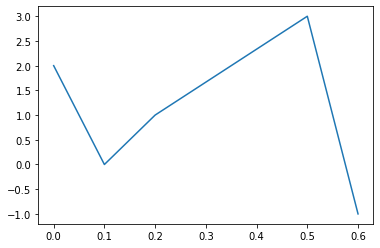

In [9]:
plt.plot([0, 0.1, 0.2, 0.5,0.6], [2, 0, 1, 3, -1])

La función plot recibe una sola lista (si queremos especificar los valores y) o dos listas (si especificamos x e y). Naturalmente si especificamos dos listas ambas tienen que tener la misma longitud.

La tarea más habitual a la hora de trabajar con matplotlib es representar una función. Lo que tendremos que hacer es definir un dominio y evaluarla en dicho dominio. Por ejemplo:


$f(x)= e^{-x^{2}}$

In [81]:
def f(x):
    return np.exp(-x ** 2)

Definimos el dominio con la función np.linspace, que crea un vector de puntos equiespaciados:

In [80]:
x = np.linspace(-1, 5, num=30)

Y por ultimo representamos la función:

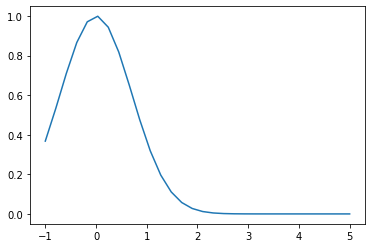

In [16]:
plt.plot(x, f(x))
#plt.legend()
#plt.xlabel("Eje $x$")
#plt.ylabel("$f(x)$")
#plt.title("Función $f(x)$")

### Personalización


La función plot acepta una serie de argumentos para personalizar el aspecto de la función. Con una letra podemos especificar el color, y con un símbolo el tipo de línea.

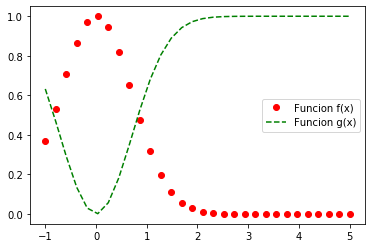

In [28]:
plt.plot(x, f(x),'o',color='red',label='Funcion f(x)')
plt.plot(x, 1 - f(x),'--',color='green', label='Funcion g(x)')
plt.legend()

Esto en realidad son códigos abreviados, que se corresponden con argumentos de la función plot:

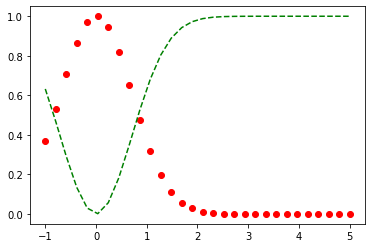

In [29]:
plt.plot(x, f(x), color='red', linestyle='', marker='o')
plt.plot(x, 1 - f(x), c='g', ls='--')

La lista de posibles argumentos y abreviaturas está disponible en la documentación de la función plot http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot.

## Otro tipo de gráficas

La función scatter muestra una nube de puntos, con posibilidad de variar también el tamaño y el color.

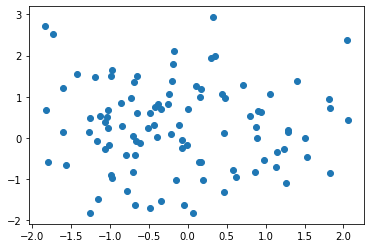

In [34]:
N = 100
x = np.random.randn(N)
y = np.random.randn(N)

plt.scatter(x, y)

Con s y c podemos modificar el tamaño y el color respectivamente. Para el color, a cada valor numérico se le asigna un color a través de un mapa de colores; ese mapa se puede cambiar con el argumento cmap. Esa correspondencia se puede visualizar llamando a la función colorbar.

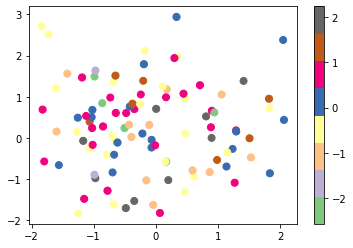

In [44]:
s = 50+np.random.randn(N)
c = np.random.randn(N)

plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Accent)
plt.colorbar()

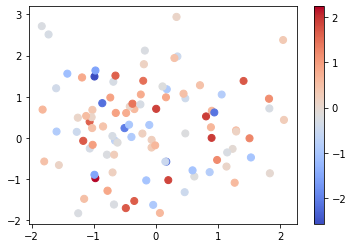

In [48]:
plt.scatter(x, y, s=s, c=c, cmap=plt.cm.coolwarm)
plt.colorbar()

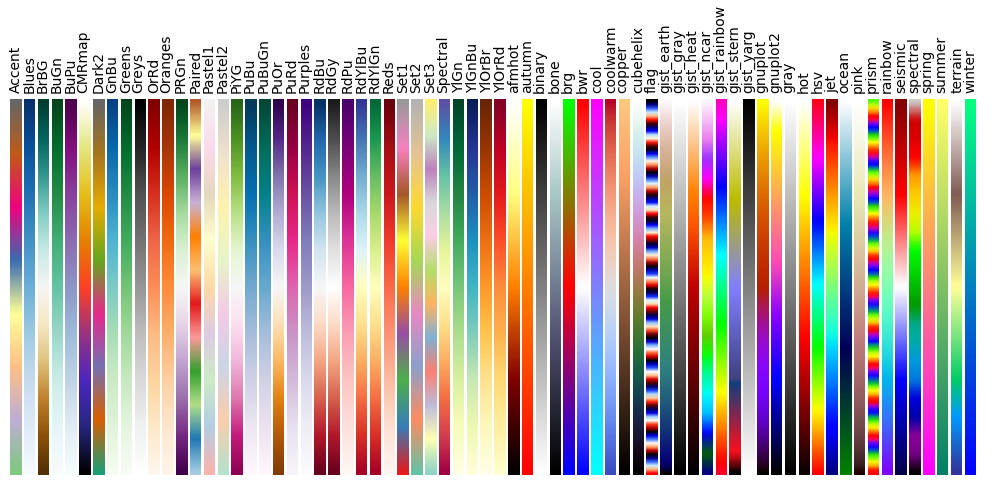

La función contour se utiliza para visualizar las curvas de nivel de funciones de dos variables y está muy ligada a la función np.meshgrid. 

Ejemplo: $f(x)= cos x + sen^2 y$

In [49]:
def f(x, y):
    return np.cos(x) + np.sin(y) ** 2

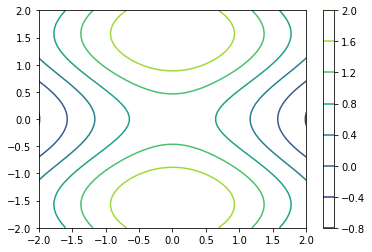

In [54]:
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)

xx, yy = np.meshgrid(x, y)

plt.contour(xx, yy, f(xx, yy))
plt.colorbar()

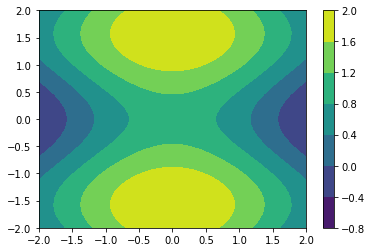

In [73]:
zz = f(xx, yy)
plt.contourf(xx, yy, zz)
plt.colorbar()

Para guardar las gráficas en archivos aparte podemos usar la función plt.savefig. matplotlib usará el tipo de archivo adecuado según la extensión que especifiquemos.

## Interfaz orientada a objetos de Matplotlib

In [82]:
x

array([-1.        , -0.79310345, -0.5862069 , -0.37931034, -0.17241379,
        0.03448276,  0.24137931,  0.44827586,  0.65517241,  0.86206897,
        1.06896552,  1.27586207,  1.48275862,  1.68965517,  1.89655172,
        2.10344828,  2.31034483,  2.51724138,  2.72413793,  2.93103448,
        3.13793103,  3.34482759,  3.55172414,  3.75862069,  3.96551724,
        4.17241379,  4.37931034,  4.5862069 ,  4.79310345,  5.        ])

In [83]:
f(x)

array([3.67879441e-01, 5.33117686e-01, 7.09185234e-01, 8.65994832e-01,
       9.70710971e-01, 9.98811646e-01, 9.43400884e-01, 8.17952307e-01,
       6.50996579e-01, 4.75607235e-01, 3.18960733e-01, 1.96356377e-01,
       1.10961373e-01, 5.75595853e-02, 2.74083260e-02, 1.19802640e-02,
       4.80694649e-03, 1.77048075e-03, 5.98593712e-04, 1.85777072e-04,
       5.29262471e-05, 1.38410522e-05, 3.32266179e-06, 7.32187295e-07,
       1.48107572e-07, 2.75011817e-08, 4.68753445e-09, 7.33426522e-10,
       1.05338655e-10, 1.38879439e-11])

(-1, 2)

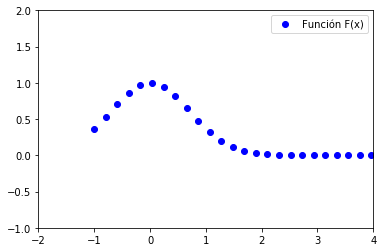

In [85]:
fig, axes = plt.subplots()

axes.plot(x, f(x), 'bo', label="Función F(x)")
axes.legend()
axes.set_xlim(-2, 4)
axes.set_ylim(-1, 2)

Text(0.5, 0, 'Eje x de la gráfica derecha')

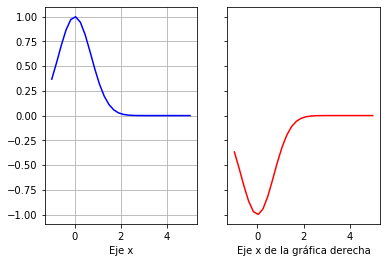

In [88]:
fig, axes = plt.subplots(1, 2, sharey=True)

axes[0].plot(x, f(x), color="blue")
axes[0].grid()
axes[0].set_xlabel("Eje x")

axes[1].plot(x, -f(x), 'r')
axes[1].set_xlabel("Eje x de la gráfica derecha")

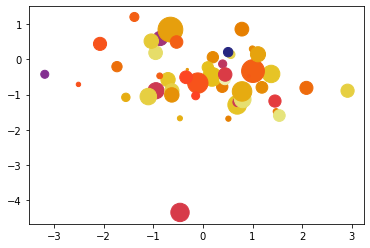

In [93]:
x = np.random.randn(100)
y = np.random.randn(100)

s = 200*np.random.randn(100)
c = np.random.randn(100)

plt.scatter(x, y, s, c, cmap=plt.cm.CMRmap)

$g(x,y)= cos (x) + sen (y)^2$

In [95]:
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)

xx, yy = np.meshgrid(x, y)

In [96]:
def g(x, y):
    return np.cos(x) + np.sin(y) ** 2

In [97]:
zz = g(xx, yy)

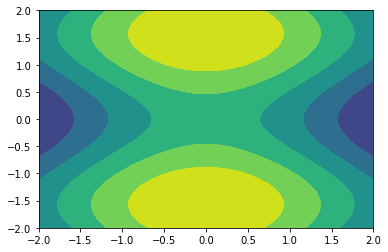

In [104]:
fig, axes = plt.subplots()

axes.contourf(xx, yy, zz)

### Ejemplo: dibujar el área bajo la curva

 $f(x)= sen * 2\pi x$
 
 $g(x)= 1.2 * sen * 4\pi x$

In [105]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 1.2 * np.sin(4 * np.pi * x)

Text(0.5, 0, 'x')

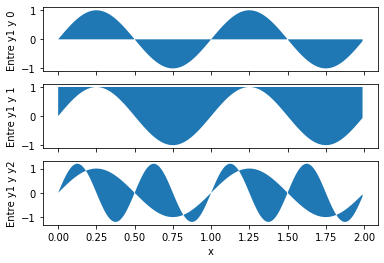

In [108]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.fill_between(x, 0, y1)
ax1.set_ylabel('Entre y1 y 0')

ax2.fill_between(x, y1, 1)
ax2.set_ylabel('Entre y1 y 1')

ax3.fill_between(x, y1, y2)
ax3.set_ylabel('Entre y1 y y2')
ax3.set_xlabel('x')

In [1]:
fig, ax = plt.subplots()
ax.plot(x, y1, x, y2, color='black')
#ax.grid()
ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='blue', interpolate=True)
ax.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax.set_title('Intersecciones entre y1 y y2')

NameError: name 'plt' is not defined

## Pandas

En Computación y Ciencia de datos, pandas es una biblioteca de software escrita como extensión de NumPy para manipulación y análisis de datos para el lenguaje de programación Python.


### ¿Qué problemas resuelve Pandas?

Python ha sido durante mucho tiempo excelente para la mezcla y preparación de datos, pero no tanto para el análisis y modelado de datos. pandas ayuda a llenar este vacío, permitiéndole llevar a cabo todo su flujo de trabajo de análisis de datos en Python sin tener que cambiar a un lenguaje más específico de dominio como R.

In [5]:
import pandas as pd
import numpy as np

### Creación de un Dataframe

In [4]:
datos={'Nombres': ['Juan','Pedro','José','Ana'],
      'Materias': ['Química','Cálculo','Algebra Lineal','Artes'],
      'Calificaciones' : ['100','80','90','90']}
df=pd.DataFrame(datos)
df

,Nombres,Materias,Calificaciones
0,Juan,Química,100
1,Pedro,Cálculo,80
2,José,Algebra Lineal,90
3,Ana,Artes,90


### Principales funciones par manipular un DataFrame

In [24]:
def header(msg):
    print('-' * 50)
    print('[ ' + msg + ' ]')
#Leer un archivo de texto con información
header("2. Leer un archivo de texto a df")
df = pd.read_csv('temperaturas.txt')
print(df)

--------------------------------------------------
[ 2. Leer un archivo de texto a df ]
   month  avg_high  avg_low  record_high  record_low  avg_precipitation
0    Jan        58       42           74          22               2.95
1    Feb        61       45           78          26               3.02
2    Mar        65       48           84          25               2.34
3    Apr        67       50           92          28               1.02
4    May        71       53           98          35               0.48
5    Jun        75       56          107          41               0.11
6    Jul        77       58          105          44               0.00
7    Aug        77       59          102          43               0.03
8    Sep        77       57          103          40               0.17
9    Oct        73       54           96          34               0.81
10   Nov        64       48           84          30               1.70
11   Dec        58       42           73        

In [10]:
# 3. Imprimir las primeras 5 filas o las ultimas 3 de un df
header("3. df.head()")
print(df.head())
header("3. df.tail(3)")
print(df.tail(3))

--------------------------------------------------
[ 3. df.head() ]
  month  avg_high  avg_low  record_high  record_low  avg_precipitation
0   Jan        58       42           74          22               2.95
1   Feb        61       45           78          26               3.02
2   Mar        65       48           84          25               2.34
3   Apr        67       50           92          28               1.02
4   May        71       53           98          35               0.48
--------------------------------------------------
[ 3. df.tail(3) ]
   month  avg_high  avg_low  record_high  record_low  avg_precipitation
9    Oct        73       54           96          34               0.81
10   Nov        64       48           84          30               1.70
11   Dec        58       42           73          21               2.56


In [12]:
# 4. Obtener tipos de datos, indices, columnas, valores
header("4. df.dtypes")
print(df.dtypes)

header("4. df.index")
print(df.index)

header("4. df.columns")
print(df.columns)

header("4. df.values")
print(df.values)

--------------------------------------------------
[ 4. df.dtypes ]
month                 object
avg_high               int64
avg_low                int64
record_high            int64
record_low             int64
avg_precipitation    float64
dtype: object
--------------------------------------------------
[ 4. df.index ]
RangeIndex(start=0, stop=12, step=1)
--------------------------------------------------
[ 4. df.columns ]
Index(['month', 'avg_high', 'avg_low', 'record_high', 'record_low',
       'avg_precipitation'],
      dtype='object')
--------------------------------------------------
[ 4. df.values ]
[['Jan' 58 42 74 22 2.95]
 ['Feb' 61 45 78 26 3.02]
 ['Mar' 65 48 84 25 2.34]
 ['Apr' 67 50 92 28 1.02]
 ['May' 71 53 98 35 0.48]
 ['Jun' 75 56 107 41 0.11]
 ['Jul' 77 58 105 44 0.0]
 ['Aug' 77 59 102 43 0.03]
 ['Sep' 77 57 103 40 0.17]
 ['Oct' 73 54 96 34 0.81]
 ['Nov' 64 48 84 30 1.7]
 ['Dec' 58 42 73 21 2.56]]


In [14]:
# 5. Resumen estadístico de cada columna
header("5. df.describe()")
print(df.describe())

--------------------------------------------------
[ 5. df.describe() ]
        avg_high    avg_low  record_high  record_low  avg_precipitation
count  12.000000  12.000000    12.000000   12.000000          12.000000
mean   68.583333  51.000000    91.333333   32.416667           1.265833
std     7.366488   6.060303    12.323911    8.240238           1.186396
min    58.000000  42.000000    73.000000   21.000000           0.000000
25%    63.250000  47.250000    82.500000   25.750000           0.155000
50%    69.000000  51.500000    94.000000   32.000000           0.915000
75%    75.500000  56.250000   102.250000   40.250000           2.395000
max    77.000000  59.000000   107.000000   44.000000           3.020000


In [15]:
# 6. ordenar los registros a partir de alguna columna
header("6. df.sort_values('record_high', ascending=False)")
print (df.sort_values('record_high', ascending=False))

--------------------------------------------------
[ 6. df.sort_values('record_high', ascending=False) ]
   month  avg_high  avg_low  record_high  record_low  avg_precipitation
5    Jun        75       56          107          41               0.11
6    Jul        77       58          105          44               0.00
8    Sep        77       57          103          40               0.17
7    Aug        77       59          102          43               0.03
4    May        71       53           98          35               0.48
9    Oct        73       54           96          34               0.81
3    Apr        67       50           92          28               1.02
2    Mar        65       48           84          25               2.34
10   Nov        64       48           84          30               1.70
1    Feb        61       45           78          26               3.02
0    Jan        58       42           74          22               2.95
11   Dec        58       42    

In [18]:
# 7. Seccionar registros
header("7. seccionar -- df.avg_low")
print(df.avg_low)							# indice con una columna

header("7. seccionar -- df[2:4]")
print(df[2:4])								# filas 2 a 3

header("7. seccionar -- df[['avg_low','avg_high']]")
print(df[['avg_low','avg_high']])

header("7. seccionar -- df.loc[:,['avg_low','avg_high']]")
print(df.loc[:,['avg_low','avg_high']])		# multiples columnas: df.loc[fila_inicio:fila_fin,['columna1','columna2']]

header("7. seccionar un valor escalar -- df.loc[9,['avg_precipitation']]")
print(df.loc[9,['avg_precipitation']])

header("7. df.iloc[3:5,[0,3]]")				# la funcion iloc puede recibir un rango o una lista de indices
print(df.iloc[3:5,[0,3]])

--------------------------------------------------
[ 7. seccionar -- df.avg_low ]
0     42
1     45
2     48
3     50
4     53
5     56
6     58
7     59
8     57
9     54
10    48
11    42
Name: avg_low, dtype: int64
--------------------------------------------------
[ 7. seccionar -- df[2:4] ]
  month  avg_high  avg_low  record_high  record_low  avg_precipitation
2   Mar        65       48           84          25               2.34
3   Apr        67       50           92          28               1.02
--------------------------------------------------
[ 7. seccionar -- df[['avg_low','avg_high']] ]
    avg_low  avg_high
0        42        58
1        45        61
2        48        65
3        50        67
4        53        71
5        56        75
6        58        77
7        59        77
8        57        77
9        54        73
10       48        64
11       42        58
--------------------------------------------------
[ 7. seccionar -- df.loc[:,['avg_low','avg_high']] ]
  

In [19]:
# 8. filtrar
header("8. df[df.avg_precipitation > 1.0]")	# filtrar valores de columnas
print(df[df.avg_precipitation > 1.0])

header("8. df[df['month'].isin['Jun','Jul','Aug']]")
print(df[df['month'].isin(['Jun','Jul','Aug'])])

--------------------------------------------------
[ 8. df[df.avg_precipitation > 1.0] ]
   month  avg_high  avg_low  record_high  record_low  avg_precipitation
0    Jan        58       42           74          22               2.95
1    Feb        61       45           78          26               3.02
2    Mar        65       48           84          25               2.34
3    Apr        67       50           92          28               1.02
10   Nov        64       48           84          30               1.70
11   Dec        58       42           73          21               2.56
--------------------------------------------------
[ 8. df[df['month'].isin['Jun','Jul','Aug']] ]
  month  avg_high  avg_low  record_high  record_low  avg_precipitation
5   Jun        75       56          107          41               0.11
6   Jul        77       58          105          44               0.00
7   Aug        77       59          102          43               0.03


In [20]:
# 9. Asignación -- Muy similar a seccionar
header("9. df.loc[9,['avg_precipitation']] = 101.3")
df.loc[9,['avg_precipitation']] = 101.3
print(df.iloc[9:11])

header("9. df.loc[9,['avg_precipitation']] = np.nan")
df.loc[9,['avg_precipitation']] = np.nan
print(df.iloc[9:11])

header("9. df.loc[:,'avg_low'] = np.array([5] * len(df))")
df.loc[:,'avg_low'] = np.array([5] * len(df))
print(df.head())

header("9. df['avg_day'] = (df.avg_low + df.avg_high) / 2")
df['avg_day'] = (df.avg_low + df.avg_high) / 2
print(df.head())

--------------------------------------------------
[ 9. df.loc[9,['avg_precipitation']] = 101.3 ]
   month  avg_high  avg_low  record_high  record_low  avg_precipitation
9    Oct        73       54           96          34              101.3
10   Nov        64       48           84          30                1.7
--------------------------------------------------
[ 9. df.loc[9,['avg_precipitation']] = np.nan ]
   month  avg_high  avg_low  record_high  record_low  avg_precipitation
9    Oct        73       54           96          34                NaN
10   Nov        64       48           84          30                1.7
--------------------------------------------------
[ 9. df.loc[:,'avg_low'] = np.array([5] * len(df)) ]
  month  avg_high  avg_low  record_high  record_low  avg_precipitation
0   Jan        58        5           74          22               2.95
1   Feb        61        5           78          26               3.02
2   Mar        65        5           84          25   

In [21]:
# 10. renombrar columnas
header("10. df.rename(columns = {'avg_precipitation':'avg_rain'}, inplace=True)")
df.rename(columns = {'avg_precipitation':'avg_rain'}, inplace=True)		# renombrar 1 columna
print(df.head())

header("10. df.columns = ['month','av_hi','av_lo','rec_hi','rec_lo','av_rain','av_day']")
df.columns = ['month','av_hi','av_lo','rec_hi','rec_lo','av_rain','av_day']
print(df.head())

--------------------------------------------------
[ 10. df.rename(columns = {'avg_precipitation':'avg_rain'}, inplace=True) ]
  month  avg_high  avg_low  record_high  record_low  avg_rain  avg_day
0   Jan        58        5           74          22      2.95     31.5
1   Feb        61        5           78          26      3.02     33.0
2   Mar        65        5           84          25      2.34     35.0
3   Apr        67        5           92          28      1.02     36.0
4   May        71        5           98          35      0.48     38.0
--------------------------------------------------
[ 10. df.columns = ['month','av_hi','av_lo','rec_hi','rec_lo','av_rain','av_day'] ]
  month  av_hi  av_lo  rec_hi  rec_lo  av_rain  av_day
0   Jan     58      5      74      22     2.95    31.5
1   Feb     61      5      78      26     3.02    33.0
2   Mar     65      5      84      25     2.34    35.0
3   Apr     67      5      92      28     1.02    36.0
4   May     71      5      98      35

In [27]:
# 11. iterar un df
header("11. iterate rows of df with a for loop")
for index, row in df.iterrows():
    print (index, row["month"], row["avg_high"])

--------------------------------------------------
[ 11. iterate rows of df with a for loop ]
0 Jan 58
1 Feb 61
2 Mar 65
3 Apr 67
4 May 71
5 Jun 75
6 Jul 77
7 Aug 77
8 Sep 77
9 Oct 73
10 Nov 64
11 Dec 58


In [28]:
# 12. guardar en un archivo csv
df.to_csv('foo.csv')